# Analyzing processed data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import signal

In [9]:
def analyze_rf_data(file_path, sample_rate=1e6, num_samples_to_plot=10000):
    data = np.load(file_path)
    
    low_freq = data[0, :, 0]
    high_freq = data[0, :, 1]
    
    # Time domain plot
    time = np.arange(num_samples_to_plot) / sample_rate
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(time, np.real(low_freq[:num_samples_to_plot]), label='Low Freq (Real)')
    plt.plot(time, np.real(high_freq[:num_samples_to_plot]), label='High Freq (Real)')
    plt.title('Time Domain')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()

    # Function to plot spectrogram
    def plot_spectrogram(ax, data, title):
        f, t, Sxx = signal.spectrogram(data, fs=sample_rate, nperseg=1024, noverlap=512, return_onesided=False)
        Sxx = np.fft.fftshift(Sxx, axes=0)
        f = np.fft.fftshift(f)
        im = ax.pcolormesh(t, f, 10 * np.log10(np.abs(Sxx)), shading='gouraud')
        ax.set_title(title)
        ax.set_ylabel('Frequency [Hz]')
        ax.set_xlabel('Time [sec]')
        return im

    # Spectrograms
    ax1 = plt.subplot(2, 2, 3)
    im1 = plot_spectrogram(ax1, low_freq, 'Spectrogram - Low Frequency')
    plt.colorbar(im1, ax=ax1, label='Power/Frequency (dB/Hz)')

    ax2 = plt.subplot(2, 2, 4)
    im2 = plot_spectrogram(ax2, high_freq, 'Spectrogram - High Frequency')
    plt.colorbar(im2, ax=ax2, label='Power/Frequency (dB/Hz)')

    plt.tight_layout()
    plt.show()

    # Print statistics
    print(f"Data shape: {data.shape}")
    print(f"Low frequency - Mean: {np.mean(np.abs(low_freq)):.4f}, Max: {np.max(np.abs(low_freq)):.4f}")
    print(f"High frequency - Mean: {np.mean(np.abs(high_freq)):.4f}, Max: {np.max(np.abs(high_freq)):.4f}")


Analyzing file: ../data/processed/combined_0.npy


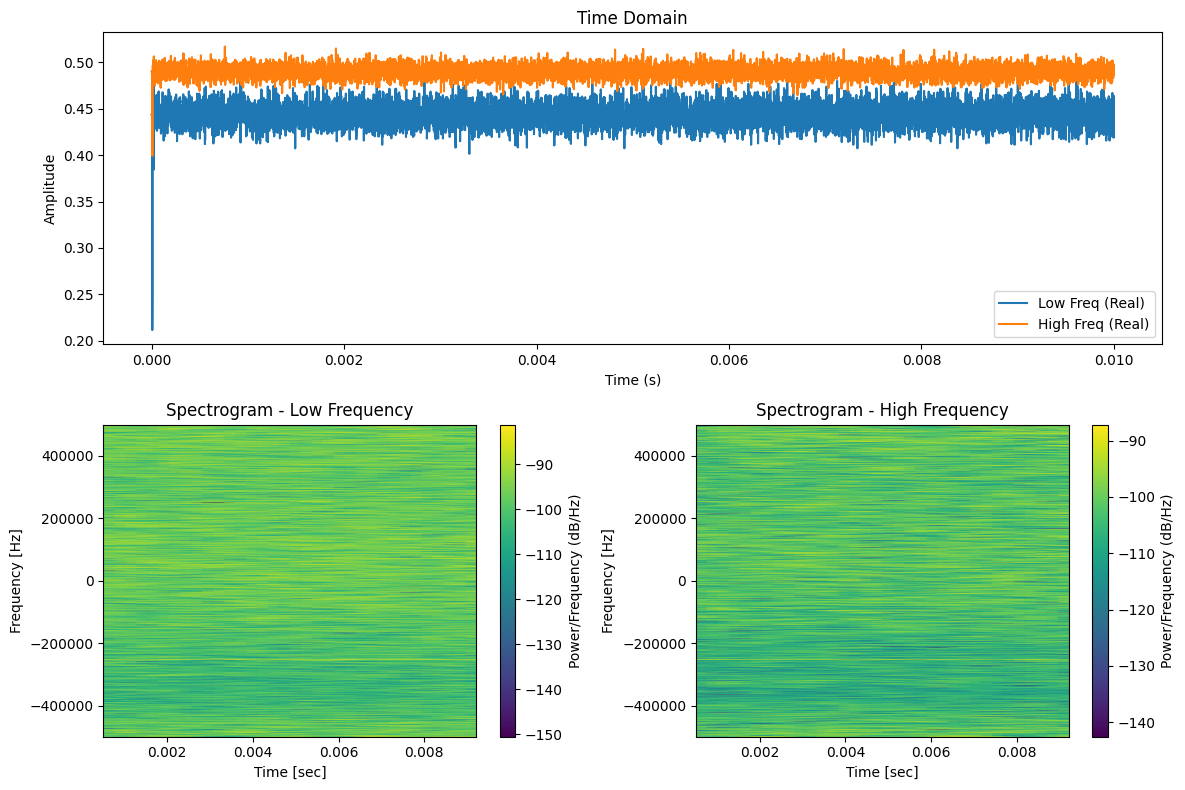

Data shape: (500, 10000, 2)
Low frequency - Mean: 0.4643, Max: 0.5107
High frequency - Mean: 0.5164, Max: 0.5449

Analyzing file: ../data/processed/combined_1.npy


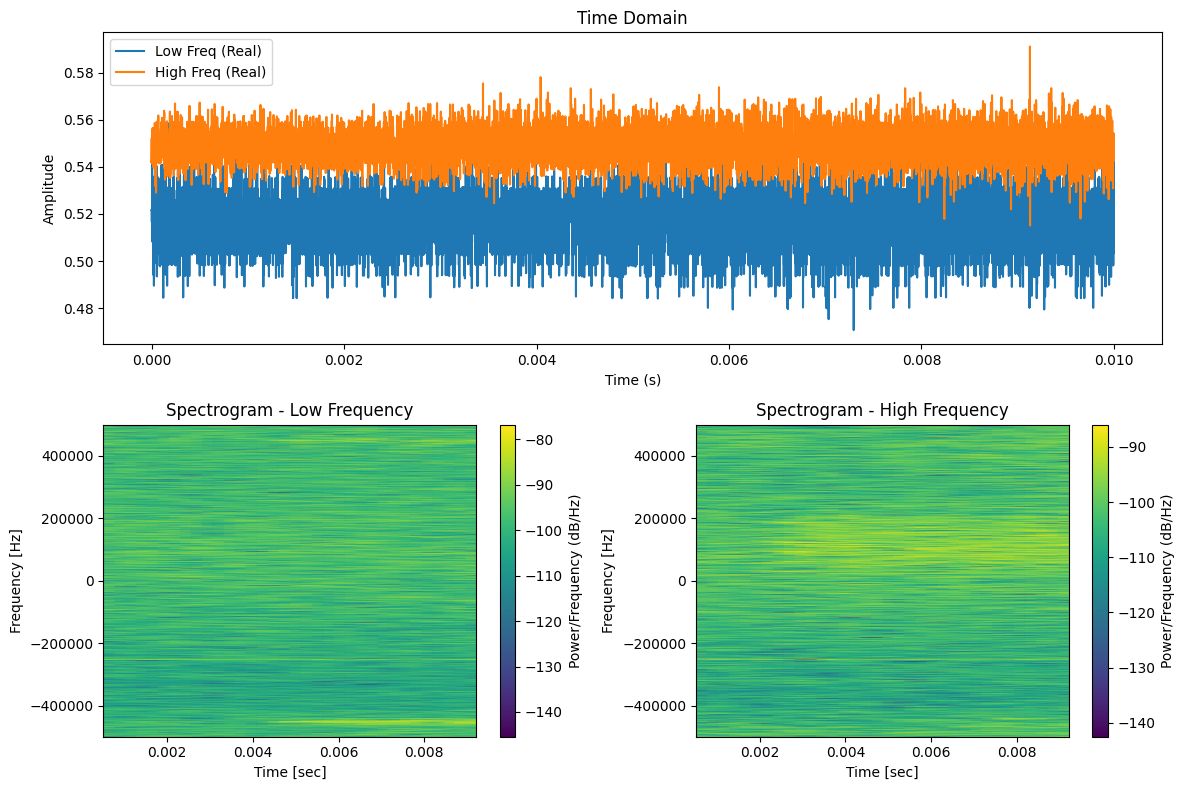

Data shape: (500, 10000, 2)
Low frequency - Mean: 0.5233, Max: 0.5662
High frequency - Mean: 0.5512, Max: 0.5930

Analyzing file: ../data/processed/combined_2.npy


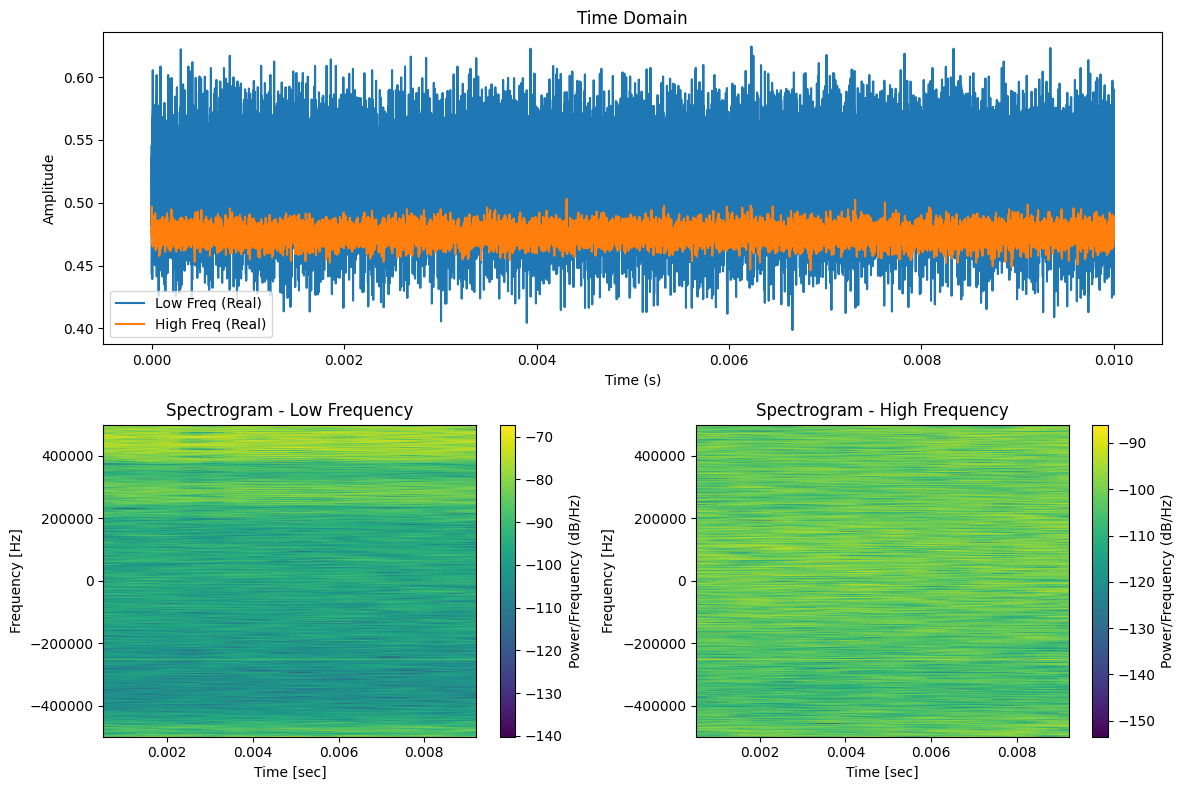

Data shape: (500, 10000, 2)
Low frequency - Mean: 0.5204, Max: 0.6294
High frequency - Mean: 0.4876, Max: 0.5182

Analyzing file: ../data/processed/combined_3.npy


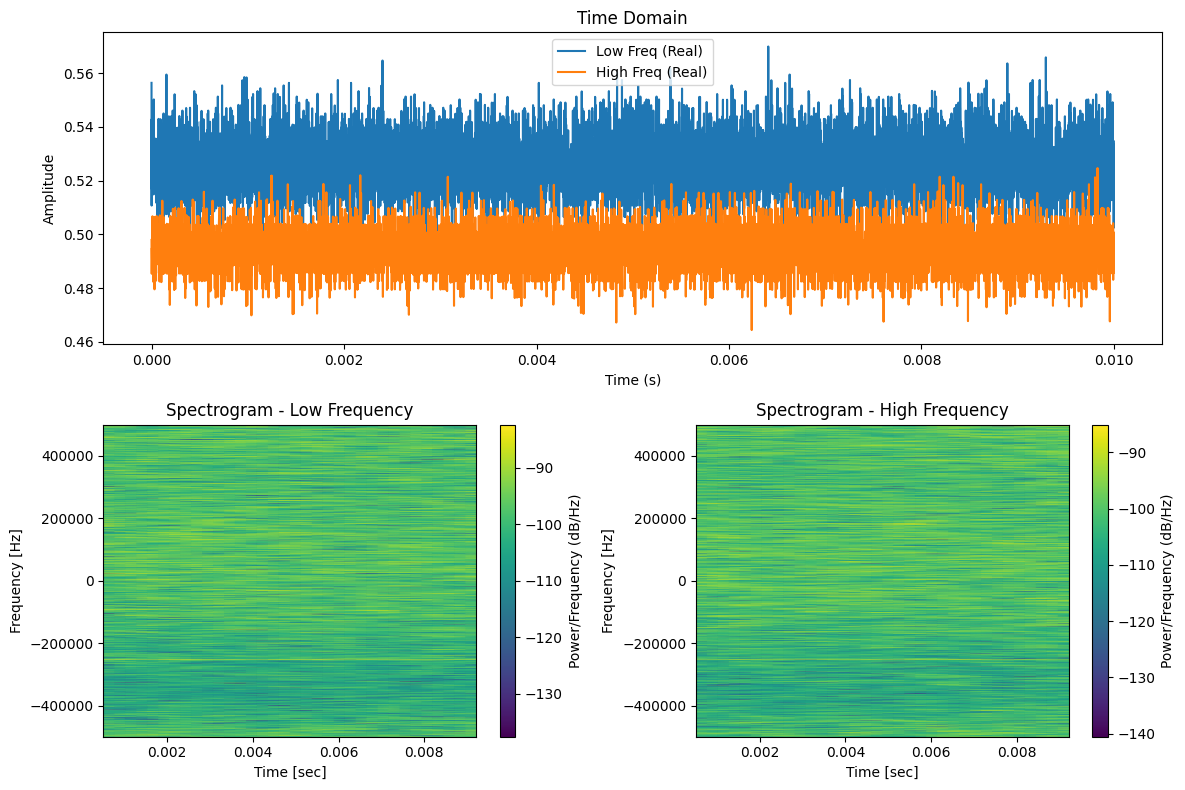

Data shape: (500, 10000, 2)
Low frequency - Mean: 0.5291, Max: 0.5720
High frequency - Mean: 0.4950, Max: 0.5250

Analyzing file: ../data/processed/combined_4.npy


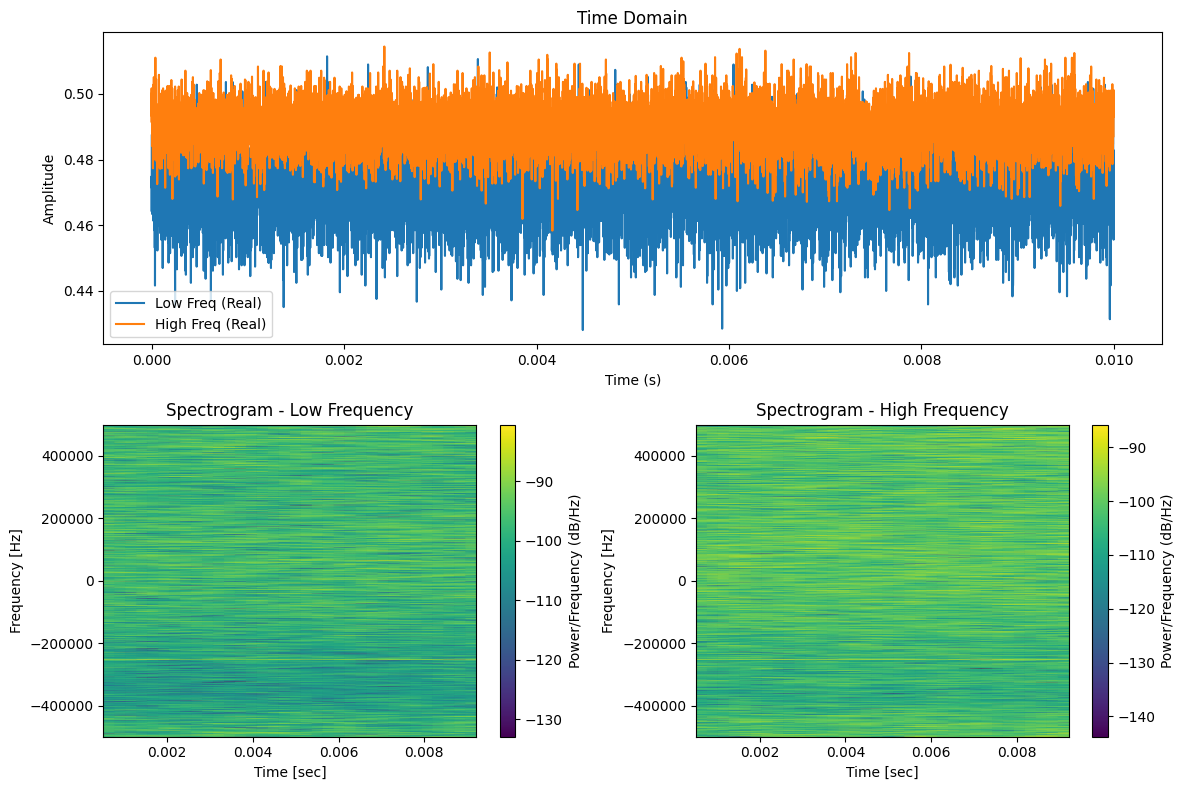

Data shape: (500, 10000, 2)
Low frequency - Mean: 0.4788, Max: 0.5156
High frequency - Mean: 0.4902, Max: 0.5152


In [10]:
processed_path = '../data/processed'
for i in range(5):
    file_path = os.path.join(processed_path, f'combined_{i}.npy')
    print(f"\nAnalyzing file: {file_path}")
    analyze_rf_data(file_path)